""

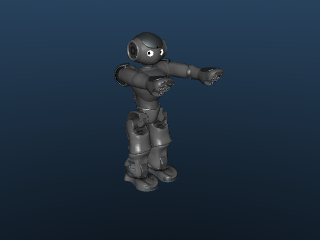

In [30]:
import mujoco
import mediapy as media
import numpy as np
import matplotlib.pyplot as plt 

# Load the scene XML file
model = mujoco.MjModel.from_xml_path("scene.xml")
data = mujoco.MjData(model)

# Make renderer, render and show the pixels
with mujoco.Renderer(model) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data)

  media.show_image(renderer.render())

Available actuators: ['HeadYaw', 'HeadPitch', 'LHipYawPitch', 'LHipRoll', 'LHipPitch', 'LKneePitch', 'LAnklePitch', 'LAnkleRoll', 'RHipRoll', 'RHipPitch', 'RKneePitch', 'RAnklePitch', 'RAnkleRoll', 'LShoulderPitch', 'LShoulderRoll', 'LElbowYaw', 'LElbowRoll', 'LWristYaw', 'RShoulderPitch', 'RShoulderRoll', 'RElbowYaw', 'RElbowRoll', 'RWristYaw']
[0.02492426 0.05329758 0.07887208]
[-0.02290438 -0.05330229  0.07849375]
[-0.01983402 -0.0533061   0.07799205]
[-0.01587579 -0.05330717  0.07746973]
[-0.01116006 -0.05330546  0.07702019]
[-0.00580091 -0.05330092  0.07672528]
[ 9.80121366e-05 -5.32945308e-02  7.66550009e-02]
[ 0.00643763 -0.05328727  0.07686755]
[ 0.01310619 -0.05327952  0.07740791]
[ 0.0200052  -0.05327167  0.07830804]
[ 0.02707473 -0.05326384  0.07959261]
[ 0.03424196 -0.05325613  0.08127687]
[ 0.04144278 -0.05324865  0.08336909]
[ 0.0486185  -0.05324147  0.08587127]
[ 0.05571573 -0.05323462  0.08878015]
[ 0.06268656 -0.05322816  0.09208808]
[ 0.06948806 -0.05322209  0.0957837

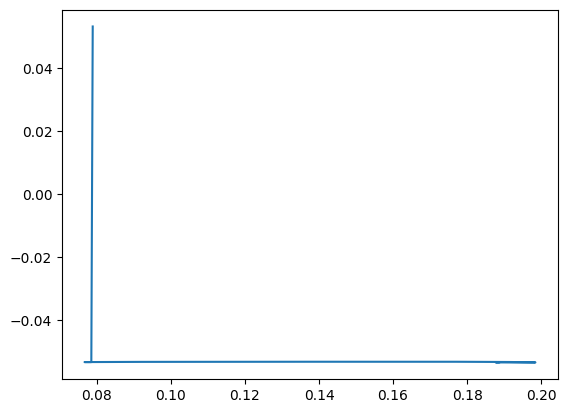

In [31]:

# Get actuator names and their indices
actuator_names = [model.actuator(i).name for i in range(model.nu)]
print("Available actuators:", actuator_names)

seconds = 3
fps = 60
frames = []

final_knee_angle = 2
initial_knee_angle = 0

knee_positions_x = []
knee_positions_y = []

# Set LKneePitch actuator to 0
data.ctrl[actuator_names.index("LKneePitch")] = 0


# Render again to see the fixed robot
with mujoco.Renderer(model) as renderer:
    for _ in range(seconds * fps):
        # Set root joint position and acceleration to zero
        data.qpos[0:6] = 0  # First 6 DoFs are root position/orientation
        data.qpos[2] = 0.4
        data.qacc[0:6] = 0  # Zero acceleration for root joint
        data.qvel[0:6] = 0  # Also zero velocity for root joint

        data.ctrl[actuator_names.index("LKneePitch")] = 2

        # Step the simulation
        mujoco.mj_step(model, data)
        renderer.update_scene(data)


        knee_positions_x.append(data.subtree_com[model.body("LFoot").id][0])
        knee_positions_y.append(data.subtree_com[model.body("LFoot").id][2])

        frames.append(renderer.render())

media.show_video(frames, fps=fps)

plt.plot(knee_positions_x, knee_positions_y)
plt.show()
